In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.metrics import silhouette_score

## 🔄 Load processed datasets
We load the two preprocessed datasets from the Data folder.

In [2]:
df_with_price = pd.read_csv("../Data/products_with_price.csv")
df_without_price = pd.read_csv("../Data/products_without_price.csv")

print("With price:", df_with_price.shape)
print("Without price:", df_without_price.shape)

With price: (20, 58)
Without price: (20, 57)


## 📊 Elbow Method: Determine optimal number of clusters
We use the elbow method on both datasets to find the best k.

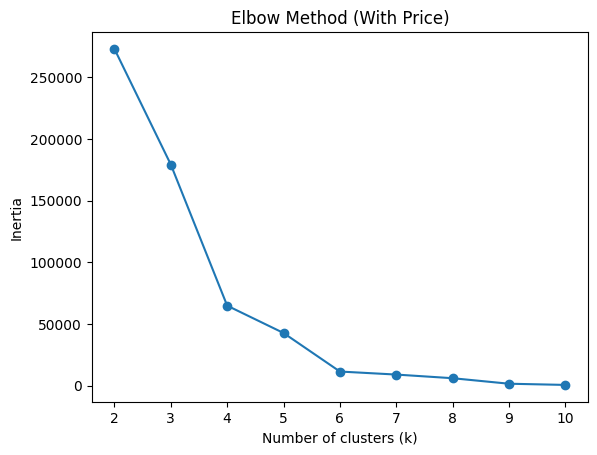

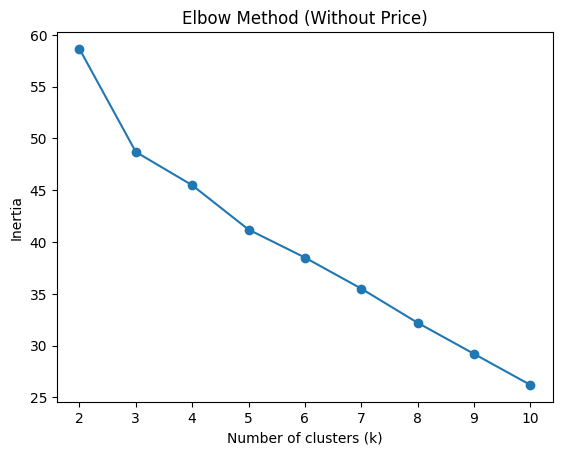

In [3]:
def plot_elbow(data, title):
    inertias = []
    K = range(2, 11)
    for k in K:
        kmeans = KMeans(n_clusters=k, random_state=42)
        kmeans.fit(data)
        inertias.append(kmeans.inertia_)
    
    plt.plot(K, inertias, marker='o')
    plt.title(title)
    plt.xlabel("Number of clusters (k)")
    plt.ylabel("Inertia")
    plt.show()

plot_elbow(df_with_price, "Elbow Method (With Price)")
plot_elbow(df_without_price, "Elbow Method (Without Price)")

## 🔐 Apply KMeans Clustering
We apply KMeans using a chosen number of clusters (e.g., 4).

In [4]:
k = 4  # You can adjust based on Elbow plot

kmeans_with = KMeans(n_clusters=k, random_state=42)
clusters_with = kmeans_with.fit_predict(df_with_price)

kmeans_without = KMeans(n_clusters=k, random_state=42)
clusters_without = kmeans_without.fit_predict(df_without_price)

## 🧠 Visualize Clusters using PCA (2D)
We reduce the data to 2 dimensions for visual analysis.

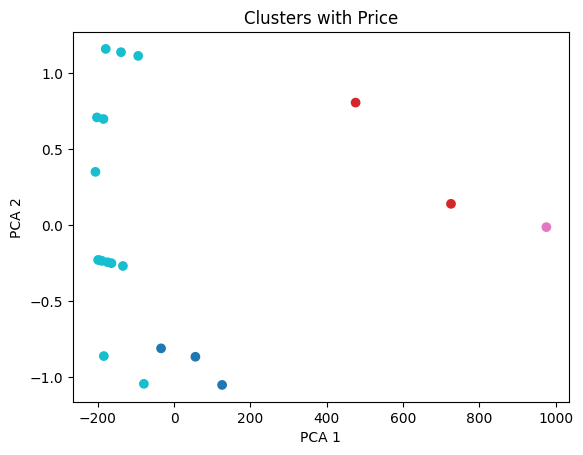

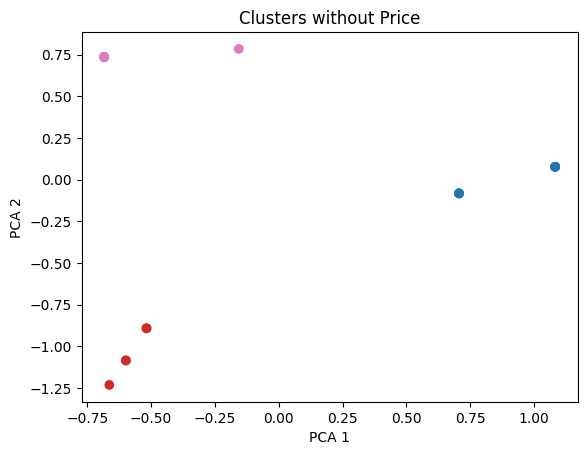

In [5]:
def plot_clusters(data, labels, title):
    pca = PCA(n_components=2)
    reduced = pca.fit_transform(data)
    
    plt.scatter(reduced[:, 0], reduced[:, 1], c=labels, cmap="tab10")
    plt.title(title)
    plt.xlabel("PCA 1")
    plt.ylabel("PCA 2")
    plt.show()

plot_clusters(df_with_price, clusters_with, "Clusters with Price")
plot_clusters(df_without_price, clusters_without, "Clusters without Price")

## 📐 Silhouette Score
To compare clustering quality quantitatively.

In [6]:
score_with = silhouette_score(df_with_price, clusters_with)
score_without = silhouette_score(df_without_price, clusters_without)

print(f"Silhouette Score (with price): {score_with:.3f}")
print(f"Silhouette Score (without price): {score_without:.3f}")

Silhouette Score (with price): 0.623
Silhouette Score (without price): 0.103


## 💾 Save Cluster Assignments
We save the cluster IDs to later merge with product IDs.

In [7]:
pd.DataFrame({"cluster_id_with_price": clusters_with}).to_csv("../Data/clusters_with_price.csv", index=False)
pd.DataFrame({"cluster_id_no_price": clusters_without}).to_csv("../Data/clusters_no_price.csv", index=False)

print("✅ Cluster results saved.")

✅ Cluster results saved.
